# Laboratory 3

## Task
Find a model with the greatest generalization power for the MNIST dataset. Start with the logistic regression model on MNIST from the lecture. To evaluate models use 3-fold and 5-fold validation. In order to create new models try:
- various learning rates;
- to increase models capacity by adding more layers or using layers with more parameters;
- to regularize models by adding weight regularization (L1, L2, and L1_L2) as well as adding dropout.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [16]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0

In [17]:
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)

In [18]:
def build_model(model_type="logistic", learning_rate=0.001, reg=None, dropout_rate=0.0):
    model = keras.Sequential()
    
    if model_type == "logistic":
        model.add(layers.Dense(num_classes, activation='softmax', input_shape=(784,)))
    
    elif model_type == "mlp2":
        model.add(layers.Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(num_classes, activation='softmax'))

    elif model_type == "mlp3":
        model.add(layers.Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(64, activation='relu', kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(num_classes, activation='softmax'))

    elif model_type == "mlp4":
        model.add(layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(256, activation='relu', kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(64, activation='relu', kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(
        loss="categorical_crossentropy",
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=["accuracy"],
    )
    
    return model

In [19]:
def cross_validate_model(model_type, k=3, learning_rate=0.001, reg=None, dropout=0.0):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    acc_scores = []

    for train_index, val_index in kf.split(x_train):
        x_tr, x_val = x_train[train_index], x_train[val_index]
        y_tr, y_val = y_train_cat[train_index], y_train_cat[val_index]

        model = build_model(model_type, learning_rate, reg, dropout)
        model.fit(x_tr, y_tr, epochs=5, batch_size=128, verbose=0)
        y_pred = model.predict(x_val)
        y_pred_classes = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_train[val_index], y_pred_classes)
        acc_scores.append(acc)

    return np.mean(acc_scores)

In [21]:
results = []

configs = [
    {"model_type": "logistic", "learning_rate": 0.001, "reg": None, "dropout": 0.0},
    {"model_type": "mlp2", "learning_rate": 0.001, "reg": None, "dropout": 0.0},
    {"model_type": "mlp3", "learning_rate": 0.005, "reg": regularizers.l2(0.001), "dropout": 0.0},
    {"model_type": "mlp4", "learning_rate": 0.0002, "reg": regularizers.l1(0.001), "dropout": 0.0},
    {"model_type": "mlp2", "learning_rate": 0.001, "reg": regularizers.l1_l2(l1=0.002, l2=0.002), "dropout": 0.0},
    {"model_type": "mlp3", "learning_rate": 0.001, "reg": None, "dropout": 0.3},
    {"model_type": "mlp4", "learning_rate": 0.0005, "reg": regularizers.l2(0.001), "dropout": 0.3},
]

for config in configs:
    print(f"Evaluating config: {config}")
    acc_3 = cross_validate_model(**config, k=3)
    acc_5 = cross_validate_model(**config, k=5)
    results.append((config, acc_3, acc_5))
    print(f"3-fold Accuracy: {acc_3:.4f}, 5-fold Accuracy: {acc_5:.4f}")

Evaluating config: {'model_type': 'logistic', 'learning_rate': 0.001, 'reg': None, 'dropout': 0.0}


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3-fold Accuracy: 0.9133, 5-fold Accuracy: 0.9153
Evaluating config: {'model_type': 'mlp2', 'learning_rate': 0.001, 'reg': None, 'dropout': 0.0}


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3-fold Accuracy: 0.9732, 5-fold Accuracy: 0.9748
Evaluating config: {'model_type': 'mlp3', 'learning_rate': 0.005, 'reg': <keras.src.regularizers.regularizers.L2 object at 0x000002C95DE74280>, 'dropout': 0.0}


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3-fold Accuracy: 0.9509, 5-fold Accuracy: 0.9534
Evaluating config: {'model_type': 'mlp4', 'learning_rate': 0.0002, 'reg': <keras.src.regularizers.regularizers.L1 object at 0x000002C95DE742E0>, 'dropout': 0.0}


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3-fold Accuracy: 0.9006, 5-fold Accuracy: 0.9070
Evaluating config: {'model_type': 'mlp2', 'learning_rate': 0.001, 'reg': <keras.src.regularizers.regularizers.L1L2 object at 0x000002C95DE74220>, 'dropout': 0.0}


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
3-fold Accuracy: 0.9054, 5-fold Accuracy: 0.9069
Evaluating config: {'model_type': 'mlp3', 'learning_rate': 0.001, 'reg': None, 'dropout': 0.3}


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3-fold Accuracy: 0.9705, 5-fold Accuracy: 0.9733
Evaluating config: {'model_type': 'mlp4', 'learning_rate': 0.0005, 'reg': <keras.src.regularizers.regularizers.L2 object at 0x000002C95DE74400>, 'dropout': 0.3}


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3-fold Accuracy: 0.9687, 5-fold Accuracy: 0.9693


In [22]:
print("\nSorted by 5-fold accuracy:")
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)
for cfg, acc3, acc5 in sorted_results:
    print(f"Config: {cfg} | 3-fold: {acc3:.4f} | 5-fold: {acc5:.4f}")



Sorted by 5-fold accuracy:
Config: {'model_type': 'mlp2', 'learning_rate': 0.001, 'reg': None, 'dropout': 0.0} | 3-fold: 0.9732 | 5-fold: 0.9748
Config: {'model_type': 'mlp3', 'learning_rate': 0.001, 'reg': None, 'dropout': 0.3} | 3-fold: 0.9705 | 5-fold: 0.9733
Config: {'model_type': 'mlp4', 'learning_rate': 0.0005, 'reg': <keras.src.regularizers.regularizers.L2 object at 0x000002C95DE74400>, 'dropout': 0.3} | 3-fold: 0.9687 | 5-fold: 0.9693
Config: {'model_type': 'mlp3', 'learning_rate': 0.005, 'reg': <keras.src.regularizers.regularizers.L2 object at 0x000002C95DE74280>, 'dropout': 0.0} | 3-fold: 0.9509 | 5-fold: 0.9534
Config: {'model_type': 'logistic', 'learning_rate': 0.001, 'reg': None, 'dropout': 0.0} | 3-fold: 0.9133 | 5-fold: 0.9153
Config: {'model_type': 'mlp4', 'learning_rate': 0.0002, 'reg': <keras.src.regularizers.regularizers.L1 object at 0x000002C95DE742E0>, 'dropout': 0.0} | 3-fold: 0.9006 | 5-fold: 0.9070
Config: {'model_type': 'mlp2', 'learning_rate': 0.001, 'reg': <

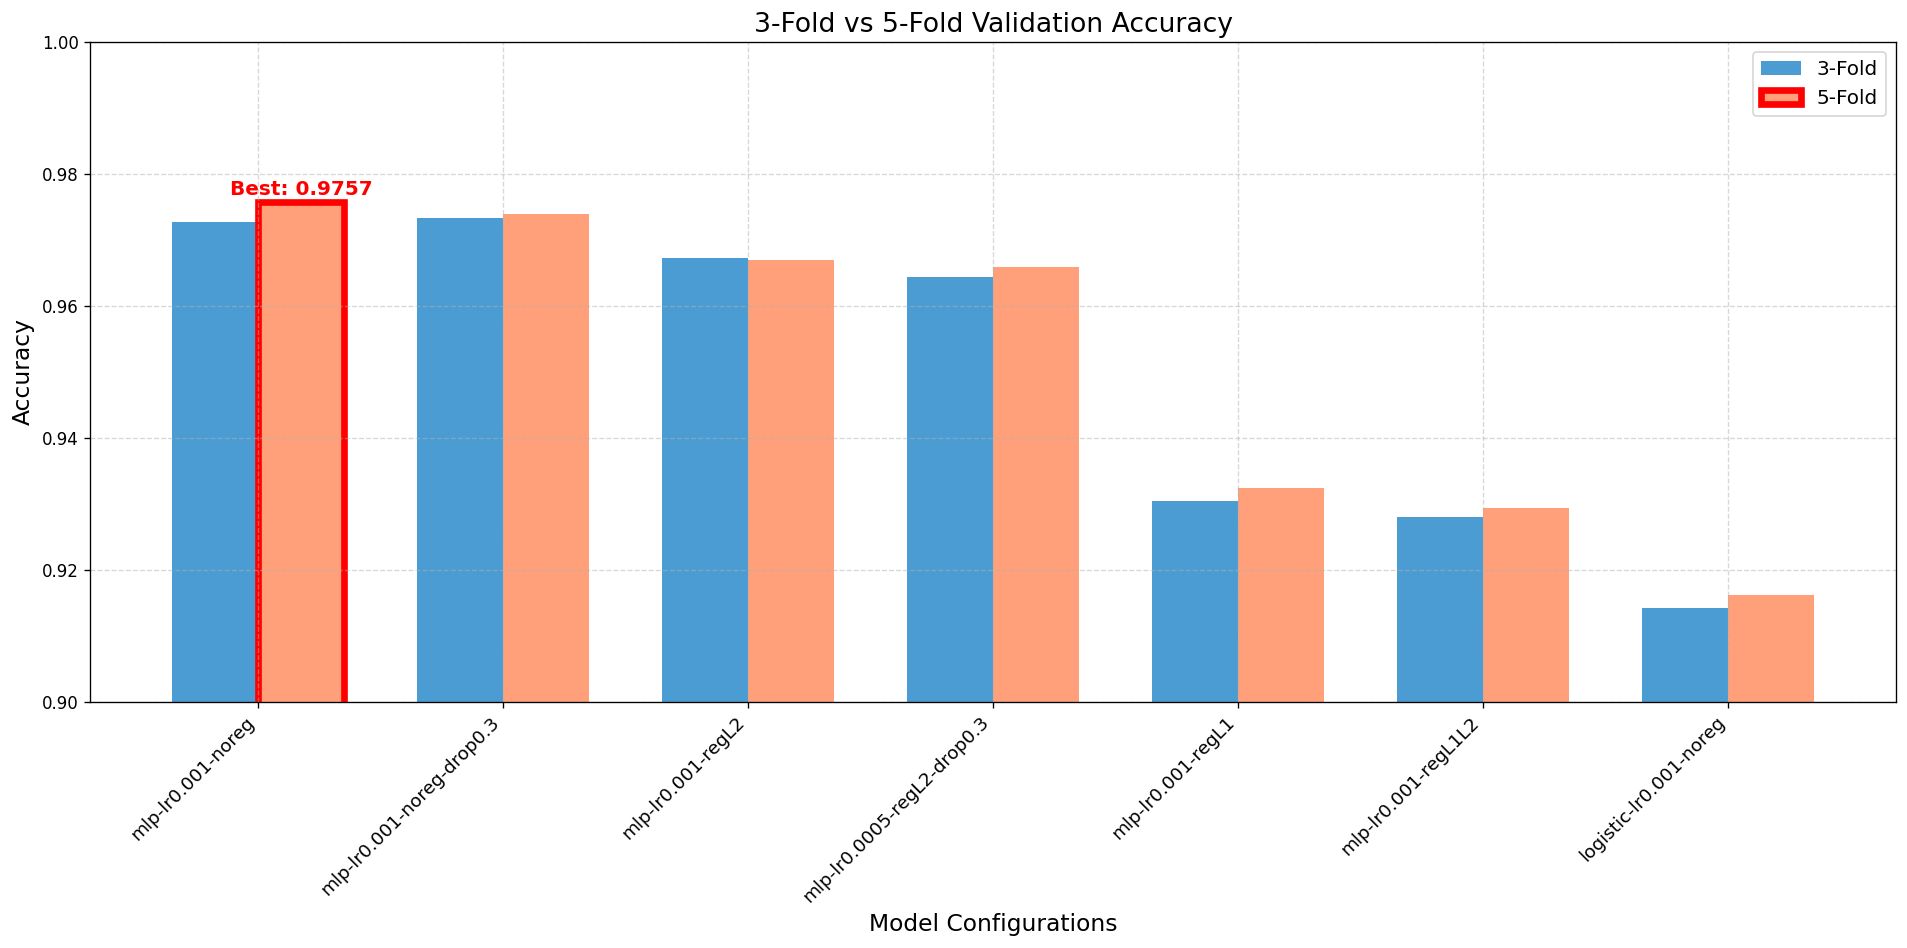

In [23]:
import matplotlib.pyplot as plt

best_index = np.argmax(acc_5_fold)
best_label = labels[best_index]
best_acc = acc_5_fold[best_index]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

bars_3 = ax.bar(x - width/2, acc_3_fold, width, label='3-Fold', color='#4B9CD3')
bars_5 = ax.bar(x + width/2, acc_5_fold, width, label='5-Fold', color='#FFA07A')

bars_5[best_index].set_edgecolor('red')
bars_5[best_index].set_linewidth(4)

ax.text(x[best_index] + width/2, acc_5_fold[best_index] + 0.001,
        f"Best: {best_acc:.4f}", ha='center', color='red', fontsize=12, fontweight='bold')

ax.set_ylim([0.90, 1.00])

ax.set_xlabel('Model Configurations', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('3-Fold vs 5-Fold Validation Accuracy', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=11)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
